<a href="https://colab.research.google.com/github/wirelessATwest/PEWFIPS-HV/blob/main/Lab01_Activity01_ObjectDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**A small example of object detection using YOLO (You Only Look Once) with OpenCV in Python.**

Note: To run the bellow code efficiently in Google Colab, it is recommended to use a GPU runtime. Here's how you can change the runtime type to GPU:

Open your Google Colab notebook.

*   Click on the Runtime menu.
*   Select Change runtime type.
*   In the popup window, under Hardware accelerator, select GPU.
*   Click Save.

**Step 1: Set Up the Environment**

First, we need to set up the environment by installing the required packages and downloading the YOLO model files. Then, we'll use OpenCV to perform object detection on an image.

In [ ]:
# Install OpenCV
!pip install opencv-python

# Download the YOLOv3 model files
!wget https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg
!wget https://pjreddie.com/media/files/yolov3.weights
!wget https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names


--2024-06-20 17:02:47--  https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8342 (8.1K) [text/plain]
Saving to: ‘yolov3.cfg’

yolov3.cfg          100%[===================>]   8.15K  --.-KB/s    in 0s      

2024-06-20 17:02:48 (88.0 MB/s) - ‘yolov3.cfg’ saved [8342/8342]

--2024-06-20 17:02:48--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 162.0.215.52
Connecting to pjreddie.com (pjreddie.com)|162.0.215.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  46.0MB/s    in 5.5s    

2024-06-20 17:0

**Step 2: Load YOLO and Perform Object Detection**

Notes:
* Replace "path/to/your/image.jpg" with the path to the image you want to use for object detection.
* Ensure the image file is uploaded to your Google Colab environment. You can upload files by clicking on the folder icon on the left sidebar, then clicking the upload icon.
* This code sets up YOLO with OpenCV, performs object detection, and displays the detected objects in the image using Matplotlib.
* The use of GPU will make the object detection process much faster.

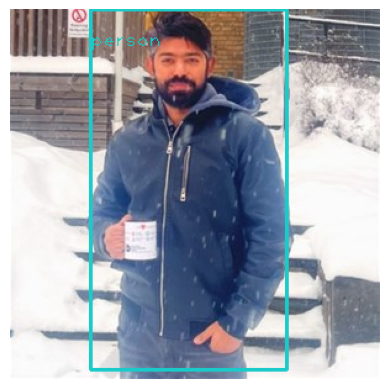

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load YOLO
net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")
with open("coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]

layer_names = net.getLayerNames()
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]

# Load an image
# Replace 'your_image.jpg' with the name of your uploaded image file
img = cv2.imread("/content/test.jpg")
height, width, channels = img.shape

# Detecting objects
blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
net.setInput(blob)
outs = net.forward(output_layers)

# Showing information on the screen
class_ids = []
confidences = []
boxes = []
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            # Object detected
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)

            # Rectangle coordinates
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)

            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

font = cv2.FONT_HERSHEY_PLAIN
font_scale = 1  # Reduced font scale
thickness = 1   # Reduced thickness
colors = np.random.uniform(0, 255, size=(len(classes), 3))

for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        color = colors[class_ids[i]]
        cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
        cv2.putText(img, label, (x, y + 30), font, font_scale, color, thickness)

# Convert the image from BGR to RGB for displaying in Colab
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(img_rgb)
plt.axis("off")  # Hide axes
plt.show()
